# Session 5- Calculating the diffusion coefficient for Na ions in glass (Joshua Giblin-Burnham)

#### Introduction:

This code analysis' data from a molecular dynamics (MD) simulation. This simulation measured how sodium ions diffuse through glass. The ions path through is modelled via the phenomenon of Brownian motion, Einstein showed that the mean square displacement (MSD) is directly proportional to the elapsed time:

$$ MSD=⟨r^2⟩=6Dt $$

The constant D is the diffusion coefficient and gives important information about the mobility of ions in the glass. This is calculated using graph of the data.

In [1]:
%matplotlib notebook

import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Plotting code adapted from my submission for PHAS0007 Session 4

t, r = np.loadtxt('Session5data.csv', dtype='float, float', delimiter=',', unpack=True)

print("Mean square displacement raw data ( 10^-20 m^2 ) :", r )
print("Simulation Times (picoseconds) raw data:", t)


Mean square displacement raw data ( 10^-20 m^2 ) : [66.97733153 69.00393687 71.02691592 73.04670438 75.06715793 77.08458775
 79.10092977 81.11463975 83.12702433 85.13417612 87.1357832 ]
Simulation Times (picoseconds) raw data: [30. 31. 32. 33. 34. 35. 36. 37. 38. 39. 40.]


###### Calculation:

To calculate the best square linear fit I am using the following formulas from Dr Llorente-Garcia's Data Analysis and Statistics booklet

The line of best fit is calculated using these two formulas:

$$ m = \frac{\sum(x_i - \bar{x}) y_i}{\sum (x_i - \bar{x})^2} = \frac{\sum x_i (y_i - \bar{y})}{\sum x_i (x_i - \bar{x})}; $$

$$ c = \bar{y} - m \bar{x} $$

The uncertainty in the Gradient and Intercept is calculated using:

$$ \delta{m} = \sqrt{ \frac{S}{(n-2)D}} $$

$$ \delta{c} = \sqrt{ (\frac{1}{n} + \frac{ \bar{x}^2}{D}) \frac{S}{(n-2)}   } $$

where S and D are calculated as:

$$ D= \sum{(x- \bar{x})^2}$$

$$S = \sum(y_i - mx_i -c)^2$$



In [3]:
# Calculating Fitting Parameters for Least-Square Linear Fit

n= np.size(t)
print("No. of data points", n)                                      # this returns the size of the array

r_bar= np.mean(r)
print("Mean of mean square displacement:", r_bar)

t_bar= np.mean(t)
print("Mean simulation time:", t_bar)                               #code for mean values
 
m= np.sum((r - r_bar)*t) / np.sum((t - t_bar)*t)

print("Gradient of line of best fit:", m)

c= r_bar-(m*t_bar)

print("Intercept of line of best fit:", c,"\n")
                                                                    #code for gradient and intercept
S = np.sum((r - m*t - c)**2) 

print("Sum of square of residuals:",S)

D1= np.sum((t-t_bar)**2)

print("Sum of deviation/ D",D1, "\n")
                                                                     # code for S and D

delta_m= np.sqrt(S/((n-2)*D1))
print("Uncertainty in gradient" ,delta_m)

delta_c= np.sqrt( ( (1/n) + (t_bar**2/D1) )*(S/(n-2)) )
print("Uncertainty in intercept", delta_c, "\n")
                                                                    #code for griadient and intercept  error
Df= m/6

print("Value of diffusion coefficent is:", Df)

delta_Df= delta_m/6

print("Uncertainty in diffusion coefficent", delta_Df)
                                                                    # code for the coefficent and error

No. of data points 11
Mean of mean square displacement: 77.07447159545454
Mean simulation time: 35.0
Gradient of line of best fit: 2.0162107560000138
Intercept of line of best fit: 6.507095135454065 

Sum of square of residuals: 0.0010920281598045638
Sum of deviation/ D 110.0 

Uncertainty in gradient 0.0010502660364295024
Uncertainty in intercept 0.036909044323681854 

Value of diffusion coefficent is: 0.3360351260000023
Uncertainty in diffusion coefficent 0.00017504433940491708


<IPython.core.display.Javascript object>


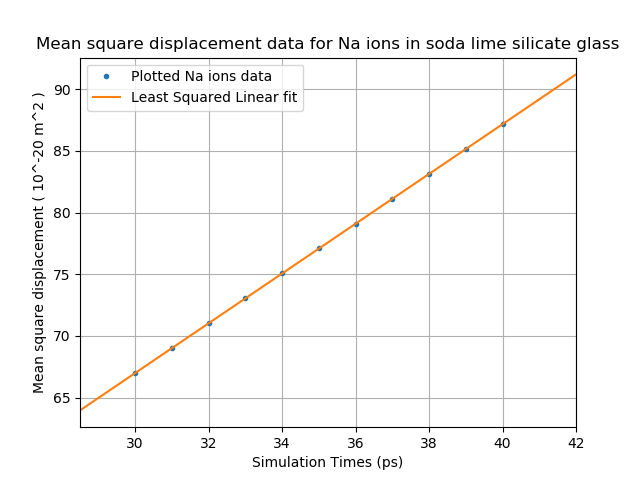

In [6]:
# Plotting code adapted from my submission for PHAS0007 Session 4

r_min= np.amin(r)
r_max= np.amax(r)
t_min= np.amin(t)
t_max= np.amax(t)
                                                    
#finding min and max of arrays


t_plot= np.linspace(t_min*0.95,t_max*1.05, 2)

#using the max/ min of t to generate and array used to plot the best square fit line

r_plot = m*t_plot + c

# find corresponding r values for best square fit line


plt.figure() 

plt.xlim(t_min*0.95,t_max*1.05) 

# set limits of x axis close to max and min of data
 
plt.grid(True)  

# Add gridlines

plt.plot(t,r, ".", label= "Plotted Na ions data")                         
plt.plot(t_plot, r_plot,"-", label='Least Squared Linear fit')

# plots points, and best square fit lines

plt.ylabel('Mean square displacement ( 10^-20 m^2 )')                         
plt.xlabel('Simulation Times (ps)')                                                  
plt.title('Mean square displacement data for Na ions in soda lime silicate glass')                  
plt.legend(loc="best")            

#plots labels title and legend


As: $$MSD = \langle r^2 \rangle = 6Dt + c. $$

The diffusion coefficent is equal to:
$$ D = \frac{m}{6}. $$

In [4]:
# FINAL VALUES

print("The value of the graident of the least square linear fit is {0:0.3f} +/- {1:0.1} 10^-8 m^2 s^-1 .".format(m,delta_m))

print("The value of the intercept of the least square linear fit is {0:0.2f} +/- {1:0.1} 10^-8 m^2 ".format(c,delta_c), "\n")

print("The value of the Diffusion Coefficent is {0:0.4f} +/- {1:0.1} 10^-8 m^2 s^-1".format(Df,delta_Df))





The value of the graident of the least square linear fit is 2.016 +/- 0.001 10^-8 m^2 s^-1 .
The value of the intercept of the least square linear fit is 6.51 +/- 0.04 10^-8 m^2  

The value of the Diffusion Coefficent is 0.3360 +/- 0.0002 10^-8 m^2 s^-1


<IPython.core.display.Javascript object>


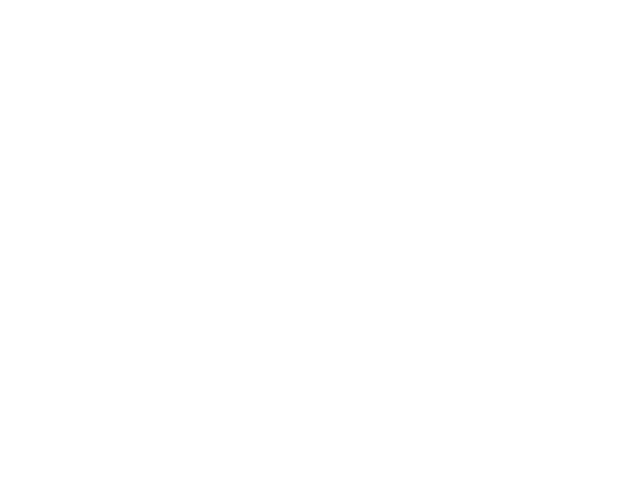

In [5]:
plt.savefig('Diffusion coefficent Graph.png') # saves to a PNG file